In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("mobile_train.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Context
1. Through building the classification models, we aim to figure a way to estimate price of mobiles in the competitive mobile phone market.
2. Find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. 
3. Predict a price range indicating how high the price is

## Data directory

*Sales data of mobile phones of various companies*

1. battery_power: Total energy a battery can store in one time measured in mAh
2. blue: Has bluetooth or not
3. clock_speed: speed at which microprocessor executes instructions
4. dual_sim: Has dual sim support or not
5. fc: Front Camera mega pixels
6. four_g: Has 4G or not
7. int_memory: Internal Memory in Gigabytes
8. m_dep: Mobile Depth in cm
9. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of processor
11. pc: Primary Camera mega pixels
12. px_height: Pixel Resolution Height
13. px_width: Pixel Resolution Width
14. ram: Random Access Memory in Mega Bytes
15. sc_h: Screen Height of mobile in cm
16. sc_w: Screen Width of mobile in cm
17. talk_time: longest time that a single battery charge will last when you are
18. three_g: Has 3G or not
19. touch_screen: Has touch screen or not
20. wifi: Has wifi or not
21. price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Data cleaning

In [4]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

## Split the data

In [51]:
x = df.iloc[:, 0:20]
y = df['price_range']
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

## Standardize the data

In [52]:
scaler = StandardScaler()

# Train
x_train = scaler.fit_transform(x_train)

# Test
x_test = scaler.fit_transform(x_test)

## KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=7) # default n = 5
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [54]:
print(accuracy_score(knn_pred, y_test))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

0.5283333333333333
[[104  34   9   1]
 [ 48  61  38   7]
 [ 16  43  66  38]
 [  2   8  39  86]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       148
           1       0.42      0.40      0.41       154
           2       0.43      0.40      0.42       163
           3       0.65      0.64      0.64       135

    accuracy                           0.53       600
   macro avg       0.53      0.54      0.53       600
weighted avg       0.52      0.53      0.52       600



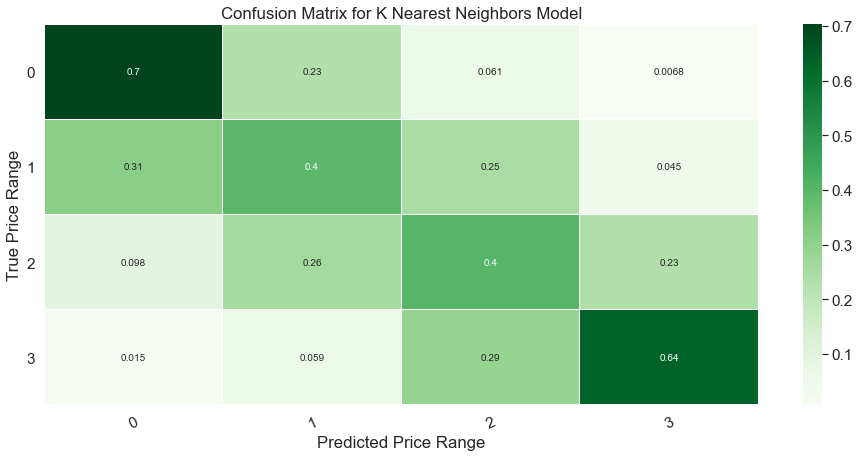

In [55]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, knn_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
plt.xticks(rotation=25)
plt.yticks(rotation=0)
plt.xlabel('Predicted Price Range')
plt.ylabel('True Price Range')
plt.title('Confusion Matrix for K Nearest Neighbors Model')
plt.show()

In [76]:
knn_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
print(knn_scores)
print('average CV:', np.mean(knn_scores))

[0.48214286 0.525      0.51785714 0.48214286 0.54642857]
average CV: 0.5107142857142857


## Multinomial Logistic

In [57]:
MLR_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
MLR_model.fit(x_train, y_train)
mlr_pred = MLR_model.predict(x_test)

In [ ]:
# MLR_model = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg')
# MLR_model.fit(x_train, y_train)
# y_pred = MLR_model.predict(x_test)

In [58]:
cm = np.array(confusion_matrix(y_test, mlr_pred))

# rows for test : price ranges 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost) 
# columns for predicted prices : 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost) 
    
pd.DataFrame(cm, index=['0 low','1 med', '2 high', '3 v.high'],
columns=['pred_low_cost', 'pred_medium_cost', 'pred_high_cost', 'pred_very_high_cost'])

,pred_low_cost,pred_medium_cost,pred_high_cost,pred_very_high_cost
0 low,143,5,0,0
1 med,9,137,8,0
2 high,0,3,148,12
3 v.high,0,0,1,134


In [59]:
print('Accuracy : {:.6f}'.format(MLR_model.score(x_test, y_test)))

Accuracy : 0.936667


In [60]:
print(classification_report(y_test, mlr_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       148
           1       0.94      0.89      0.92       154
           2       0.94      0.91      0.93       163
           3       0.92      0.99      0.95       135

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



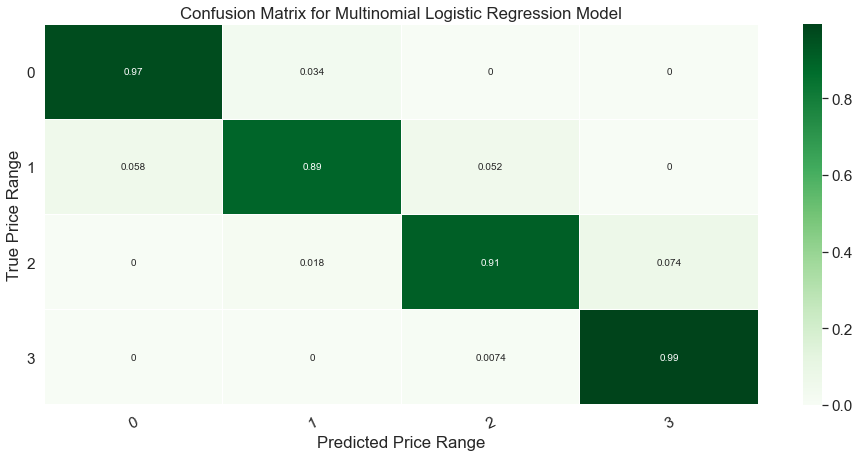

In [61]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, mlr_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
plt.xticks(rotation=25)
plt.yticks(rotation=0)
plt.xlabel('Predicted Price Range')
plt.ylabel('True Price Range')
plt.title('Confusion Matrix for Multinomial Logistic Regression Model')
plt.show()

In [75]:
mlr_scores = cross_val_score(MLR_model, x_train, y_train, cv=5, scoring='accuracy')
print(mlr_scores)
print('average CV:', np.mean(mlr_scores))

[0.95357143 0.96071429 0.94642857 0.95714286 0.94285714]
average CV: 0.9521428571428572


## Random Forest

### 1. Model training

In [106]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train.columns = x.columns
x_test.columns = x.columns

In [107]:
rf_model = RandomForestClassifier(n_estimators=100).fit(x_train, y_train.astype('int'))
rf_pred = rf_model.predict(x_test)

### 2. Testing

In [108]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       148
           1       0.84      0.83      0.84       154
           2       0.84      0.77      0.80       163
           3       0.87      0.93      0.90       135

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



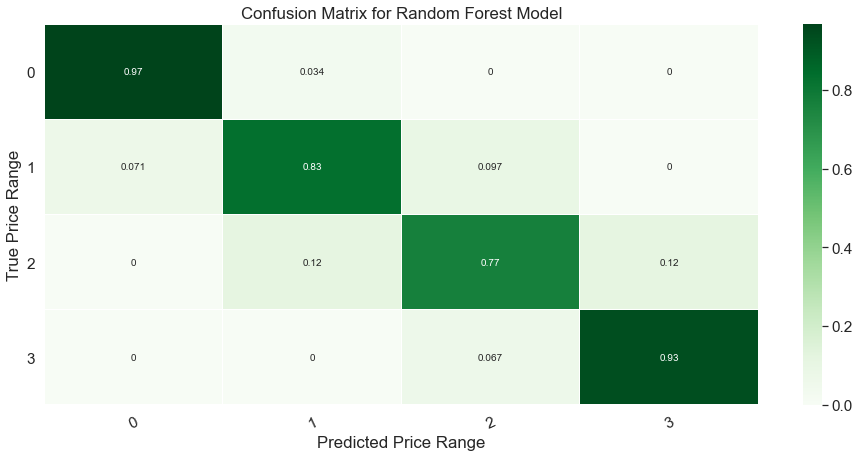

In [109]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rf_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
plt.xticks(rotation=25)
plt.yticks(rotation=0)
plt.xlabel('Predicted Price Range')
plt.ylabel('True Price Range')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [110]:
# CV
rf_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy')
print(rf_scores)
print('average CV:', np.mean(rf_scores))

[0.87857143 0.85357143 0.86071429 0.83928571 0.82857143]
average CV: 0.8521428571428572


### 3. Feature importance

In [111]:
x_train = pd.DataFrame(x_train)
feature_imp = rf_model.feature_importances_
np.shape(np.transpose(feature_imp))
fimp_pd = pd.DataFrame(feature_imp.T, index = x_train.columns)
print(fimp_pd)

                      0
battery_power  0.075918
blue           0.007117
clock_speed    0.027150
dual_sim       0.007368
fc             0.026526
four_g         0.006608
int_memory     0.039122
m_dep          0.026222
mobile_wt      0.041217
n_cores        0.023417
pc             0.030372
px_height      0.056187
px_width       0.056888
ram            0.465827
sc_h           0.029245
sc_w           0.029388
talk_time      0.032660
three_g        0.005264
touch_screen   0.006775
wifi           0.006728


Figure(1800x1080)


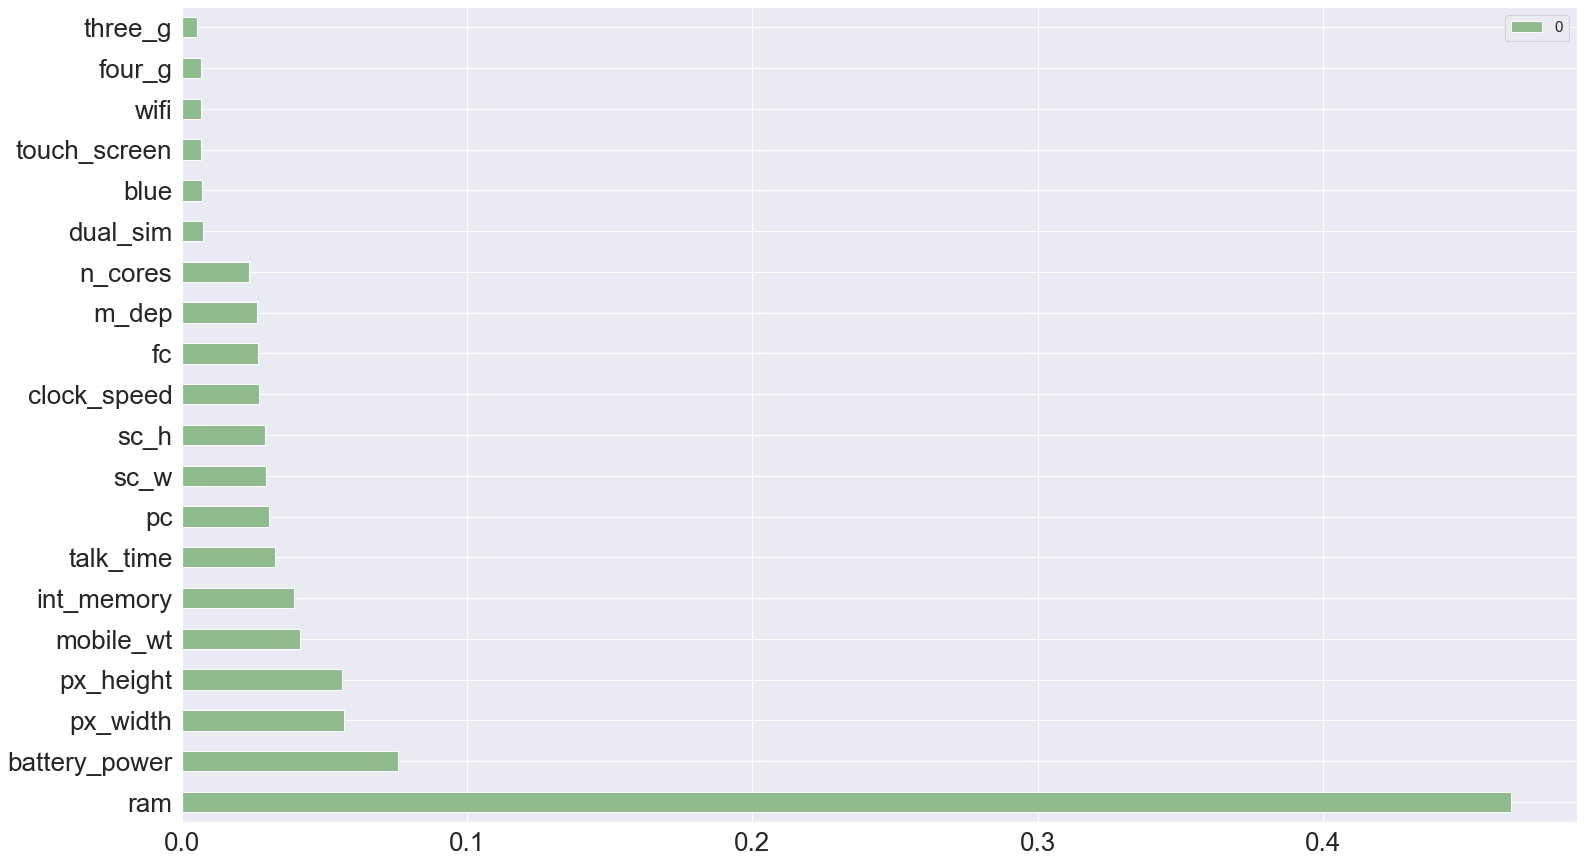

In [121]:
fig = fimp_pd.nlargest(20,0).plot(kind='barh', figsize=(25, 15),fontsize=26, color='darkseagreen').get_figure()
print(fig)

## Model Comparison

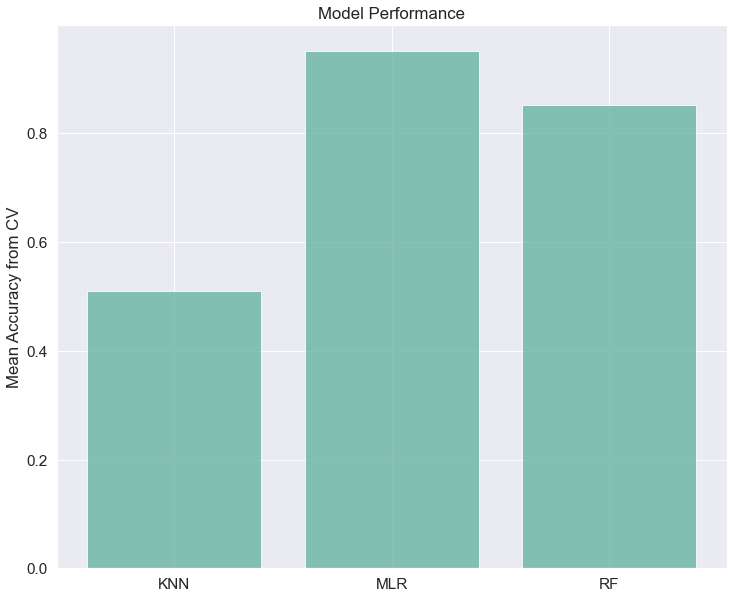

In [113]:
k = np.mean(knn_scores)
m = np.mean(mlr_scores)
r = np.mean(rf_scores)
models = ['KNN', 'MLR', 'RF']
performance = [k, m, r]

plt.figure(figsize=(12,10))
plt.bar(models, performance, align='center', alpha=0.8, color='#69b3a2')
plt.ylabel('Mean Accuracy from CV')
plt.title('Model Performance')
plt.show()

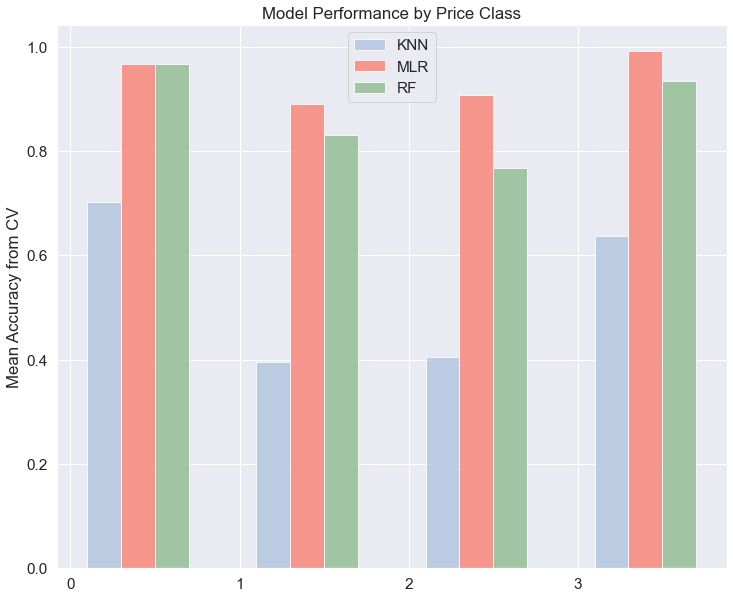

In [157]:
# knn
matrix1 = confusion_matrix(y_test, knn_pred)
matrix1 = matrix1.astype('float') / matrix1.sum(axis=1)[:, np.newaxis]

# mlr
matrix2 = confusion_matrix(y_test, mlr_pred)
matrix2 = matrix2.astype('float') / matrix2.sum(axis=1)[:, np.newaxis]

# rf
matrix3 = confusion_matrix(y_test, rf_pred)
matrix3 = matrix3.astype('float') / matrix3.sum(axis=1)[:, np.newaxis]

# get the diagonal elements from the confusion matrix
d1 = list(np.diagonal(matrix1))
d2 = list(np.diagonal(matrix2))
d3 = list(np.diagonal(matrix3))

# plot a side-by-side bar chart
plt.figure(figsize=(12,10))
labels = ["0","1","2","3"]
l = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.bar(l + 0.20, d1, width=0.2, label = 'KNN', alpha=0.8, color="lightsteelblue")
plt.bar(l + 0.20*2, d2, width=0.2, label = 'MLR', alpha=0.8, color="salmon")
plt.bar(l + 0.20*3, d3, width=0.2, label = 'RF', alpha=0.8, color="darkseagreen")

plt.ylabel('Mean Accuracy from CV')
plt.title('Model Performance by Price Class')
plt.xticks(l,labels)
plt.legend()

fig.tight_layout()
plt.show()

# ref: https://pythonguides.com/matplotlib-multiple-bar-chart/